In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_ds = keras.preprocessing.image_dataset_from_directory(
    'drive/MyDrive/car_ims',
    # 'Deep Learning/car_ims',
    validation_split=0.2,
    subset='training',
    seed=74,
    image_size=(256, 256)
)
val_ds = keras.preprocessing.image_dataset_from_directory(
    'drive/MyDrive/car_ims',
    # 'Deep Learning/car_ims',
    validation_split=0.2,
    subset='validation',
    seed=74,
    image_size=(256, 256)
)

Found 552 files belonging to 4 classes.
Using 442 files for training.
Found 552 files belonging to 4 classes.
Using 110 files for validation.


In [ ]:
num_classes = 4
input_shape = (256, 256, 3)

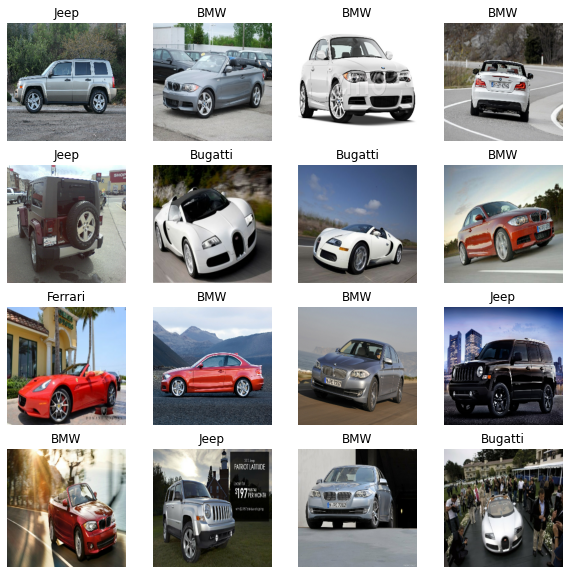

In [ ]:
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(train_ds.class_names[labels[i]])
        plt.axis("off")

In [ ]:
preprocessing = keras.Sequential(
    [
    #  layers.Resizing(256,256),
     layers.RandomFlip('horizontal'),
     layers.RandomRotation(0.1),
    #  layers.RandomTranslation((-0.1, 0.1), (-0.1, 0.1)),
     layers.RandomZoom((-0.1, 0.1))
    ],
    name="preprocessing"
)

In [ ]:
model = keras.Sequential(
    [
     layers.Input(shape=input_shape),
     preprocessing,

     layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same', kernel_initializer='he_uniform', kernel_regularizer='l1'),
     layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same', kernel_initializer='he_uniform', kernel_regularizer='l1'),
     layers.MaxPooling2D(pool_size=(3, 3), strides=(2,2)),

     layers.Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same', kernel_initializer='he_uniform', kernel_regularizer='l1'),
     layers.Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same', kernel_initializer='he_uniform', kernel_regularizer='l1'),
     layers.MaxPooling2D(pool_size=(3, 3), strides=(2,2)),

     layers.Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same', kernel_initializer='he_uniform', kernel_regularizer='l1'),
     layers.Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same', kernel_initializer='he_uniform', kernel_regularizer='l1'),
     layers.MaxPooling2D(pool_size=(3, 3), strides=(2,2)),

     layers.Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same', kernel_initializer='he_uniform', kernel_regularizer='l1'),
     layers.Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same', kernel_initializer='he_uniform', kernel_regularizer='l1'),
     layers.MaxPooling2D(pool_size=(3, 3), strides=(2,2)),

     layers.Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same', kernel_initializer='he_uniform', kernel_regularizer='l1'),
     layers.Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same', kernel_initializer='he_uniform', kernel_regularizer='l1'),
     layers.MaxPooling2D(pool_size=(3, 3), strides=(2,2)),

     layers.Flatten(),
     layers.Dense(4096, activation='relu', kernel_initializer='he_uniform', kernel_regularizer='l1'),
     layers.Dropout(0.5),
     layers.Dense(num_classes, activation='softmax')
    ],
    name="model"
)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 preprocessing (Sequential)  (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 127, 127, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 127, 127, 128)     147584    
                                                             

In [ ]:
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5)
early_stopping = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=25, restore_best_weights=True)

In [ ]:
batch_size = 256
epochs = 200
model.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.0001), metrics=["accuracy"])
history = model.fit(train_ds, batch_size=batch_size, epochs=epochs, validation_data=val_ds, callbacks=[early_stopping, reduce_lr])

Epoch 1/200
14/14 [==============================] - 32s 1s/step - loss: 10549.5127 - accuracy: 0.3100 - val_loss: 9463.1006 - val_accuracy: 0.2091 - lr: 1.0000e-04
Epoch 2/200
14/14 [==============================] - 10s 603ms/step - loss: 9224.2227 - accuracy: 0.2851 - val_loss: 8976.2910 - val_accuracy: 0.3727 - lr: 1.0000e-04
Epoch 3/200
14/14 [==============================] - 9s 601ms/step - loss: 8782.5205 - accuracy: 0.3778 - val_loss: 8550.3311 - val_accuracy: 0.4091 - lr: 1.0000e-04
Epoch 4/200
14/14 [==============================] - 10s 605ms/step - loss: 8363.4775 - accuracy: 0.4253 - val_loss: 8143.8320 - val_accuracy: 0.4818 - lr: 1.0000e-04
Epoch 5/200
14/14 [==============================] - 10s 608ms/step - loss: 7967.2935 - accuracy: 0.4593 - val_loss: 7761.0386 - val_accuracy: 0.4909 - lr: 1.0000e-04
Epoch 6/200
14/14 [==============================] - 9s 582ms/step - loss: 7596.2002 - accuracy: 0.4796 - val_loss: 7405.6743 - val_accuracy: 0.4545 - lr: 1.0000e-04
Ep

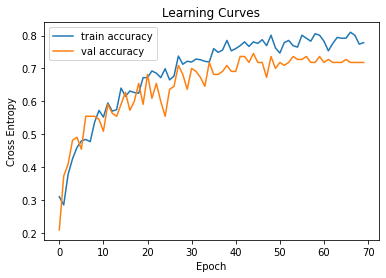

In [ ]:
plt.title('Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('Cross Entropy')
# plt.plot(history.history['loss'], label='train loss')
# plt.plot(history.history['val_loss'], label='val loss')
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()

In [ ]:
score = model.evaluate(val_ds, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 3751.38330078125
Test accuracy: 0.7454545497894287
